# Import Libraries

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [12]:
import pandas as pd

# Load the Excel file
file_path = r'Campaign_Use_Case.xlsx'
xls = pd.ExcelFile(file_path)

# Load each sheet into a DataFrame
list_of_campaigns_df = pd.read_excel(xls, sheet_name='List of  Campaigns', skiprows=2)

# Inspect the data
display(list_of_campaigns_df.head())

,CAMPAIGN_ID,CAMPAIGN_NAME,STATUS,Branch,CCC
0,88815,BB Trigger Promo Code Campaign,Active,YES,NaN
1,88816,Retail Checking Trigger Program,Active,YES,YES
2,88818,Apply Now Abandoned Applications Followup Trigger,Active,YES,YES
3,88819,Onboarding Leads Campaign,Active,YES,YES
4,88821,BB Onboarding Leads Campaign,Active,YES,NaN


Print the count of campaigns as per their status  

In [13]:
print(list_of_campaigns_df['STATUS'].value_counts())

STATUS
Active                18
Temporarily Paused     1
Paused                 1
STATUS                 1
Name: count, dtype: int64


Load Data from trigger campaign perfromance sheet for Nov 23 Branch Data

In [14]:
start_row = 5  # The first row to load (1-based index)
end_row = 18  # The last row to load (1-based index)

# Calculate the number of rows to skip and the number of rows to read
skip_rows_branch = list(range(start_row - 1))  # Rows to skip (0-based index)
num_rows_branch = end_row - start_row + 1

trigger_campaign_performance_df_branch = pd.read_excel(xls, sheet_name='Trigger Campaign Performance',skiprows=skip_rows_branch,nrows=num_rows_branch)

display(trigger_campaign_performance_df_branch)

,Triggers,Campaign Name,STATUS,Branch,CCC,Sum of Customer Targeted,Sum of Customer Responded,Response Rate,Sum of Account Booked,Sum of Call Worked,Call Worked Rate,Sum of Current Balance per Account,Sum of Total LTV,Average of Balance per Account
0,88815,BB Trigger Promo Code Campaign,Active,YES,NaN,284,57,0.200704,91,238,0.838028,7511.394725,163481,7511.0
1,88816,Retail Checking Trigger Program,Active,YES,YES,583,91,0.156089,170,528,0.905660,20829.375059,170516,20829.0
2,88818,Apply Now Abandoned Applications Followup Trigger,Active,YES,YES,1379,225,0.163162,316,1212,0.878898,33452.448956,214658,33452.0
3,88819,Onboarding Leads Campaign,Active,YES,YES,2755,107,0.038838,138,2379,0.863521,39715.959275,154468,39715.0
4,88821,BB Onboarding Leads Campaign,Active,YES,NaN,1036,45,0.043436,46,838,0.808880,931.538043,39597,932.0
5,88822,Relationship Growth Email Follow-Up Trigger,Active,YES,YES,389,19,0.048843,22,329,0.845758,67589.479091,5176,67589.0
6,88823,BB Abandoned Applications Trigger,Active,YES,NaN,415,64,0.154217,91,337,0.812048,2658.110989,225790,2658.0
7,88825,Indirect Auto Onboarding Leads Campaign,Active,YES,YES,247,5,0.020243,10,186,0.753036,176.973000,8756,177.0
8,88826,Women in Banking BB Trigger,Active,YES,NaN,10,1,0.100000,1,6,0.600000,402.780000,3109,403.0
9,88827,Black and Latinx BB Trigger,Active,YES,NaN,50,2,0.040000,2,31,0.620000,57.500000,6218,58.0


In [15]:
start_row = 27  # The first row to load (1-based index)
end_row = 35  # The last row to load (1-based index)

# Calculate the number of rows to skip and the number of rows to read
skip_rows_branch = list(range(start_row - 1))  # Rows to skip (0-based index)
num_rows_branch = end_row - start_row + 1

trigger_campaign_performance_df_ccc = pd.read_excel(xls, sheet_name='Trigger Campaign Performance',skiprows=skip_rows_branch,nrows=num_rows_branch)

display(trigger_campaign_performance_df_ccc)

,Trigger,Campaign Name,STATUS,Branch,CCC,Sum of Customer Targeted,Sum of Customer Responded,Response Rate,Sum of Account Booked,Sum of Call Worked,Call Worked Rate,Sum of Current Balance per Account,Sum of Total LTV,Average of Balance per Account
0,88816,Retail Checking Trigger Program,Active,YES,YES,527,29,0.055028,44,187,0.354839,2933.125455,46485,2933.0
1,88818,Apply Now Abandoned Applications Followup Trigger,Active,YES,YES,1390,211,0.151799,274,564,0.405755,68978.386934,123815,68978.0
2,88819,Onboarding Leads Campaign,Active,YES,YES,1234,41,0.033225,52,99,0.080227,57757.591154,40389,57757.0
3,88822,Relationship Growth Email Follow-Up Trigger,Active,YES,YES,96,2,0.020833,4,4,0.041667,25426.355000,1300,25426.0
4,88825,Indirect Auto Onboarding Leads Campaign,Active,YES,YES,609,4,0.006568,5,91,0.149425,498.180000,3718,498.0
5,88833,BMO Smart Portfolio,Active,0,YES,880,106,0.120455,146,880,1.000000,44046.335753,114345,NaN
6,88835,BDB Credit Card Abandoned Apps,Active,YES,YES,68,1,0.014706,1,24,0.352941,384.000000,407,384.0
7,88836,BDB 'Remind Me Later' Home Equity Offers,Active,YES,YES,304,0,0.000000,0,30,0.098684,0.000000,0,0.0
8,88837,BDB 'Remind Me Later' Credit Card Offers,Active,YES,YES,359,2,0.005571,2,48,0.133705,480.940000,814,481.0


In [16]:
print(trigger_campaign_performance_df_branch.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Triggers                            14 non-null     int64  
 1   Campaign Name                       14 non-null     object 
 2   STATUS                              14 non-null     object 
 3   Branch                              14 non-null     object 
 4   CCC                                 9 non-null      object 
 5   Sum of Customer Targeted            14 non-null     int64  
 6   Sum of Customer Responded           14 non-null     int64  
 7   Response Rate                       14 non-null     float64
 8   Sum of Account Booked               14 non-null     int64  
 9   Sum of Call Worked                  14 non-null     int64  
 10  Call Worked Rate                    14 non-null     float64
 11  Sum of Current Balance per Account  14 non-null

In [17]:
trigger_campaign_performance_df_ccc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Trigger                             9 non-null      int64  
 1   Campaign Name                       9 non-null      object 
 2   STATUS                              9 non-null      object 
 3   Branch                              9 non-null      object 
 4   CCC                                 9 non-null      object 
 5   Sum of Customer Targeted            9 non-null      int64  
 6   Sum of Customer Responded           9 non-null      int64  
 7   Response Rate                       9 non-null      float64
 8   Sum of Account Booked               9 non-null      int64  
 9   Sum of Call Worked                  9 non-null      int64  
 10  Call Worked Rate                    9 non-null      float64
 11  Sum of Current Balance per Account  9 non-null   

Display the distribution of Sum of Customer Targeted for each trigger

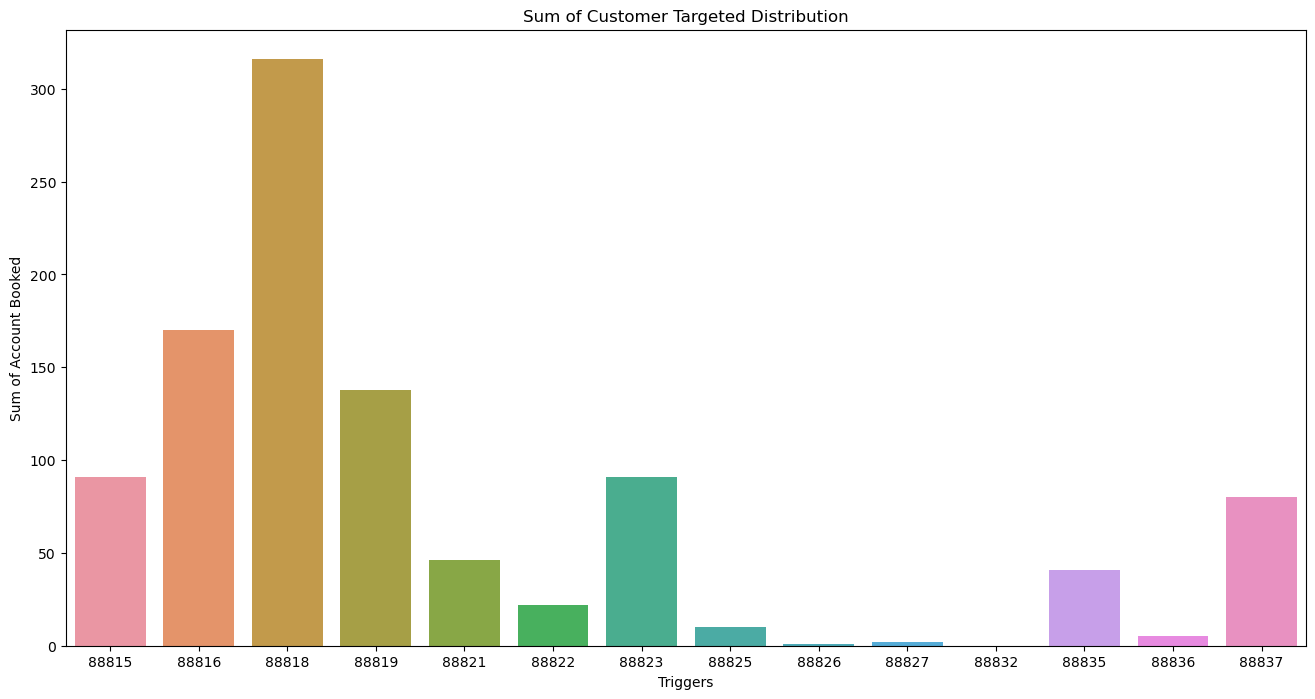

In [18]:
plt.figure(figsize=(16,8))
sns.barplot(trigger_campaign_performance_df_branch,x='Triggers',y='Sum of Account Booked')
plt.xlabel('Triggers')
plt.ylabel('Sum of Account Booked')
plt.title('Sum of Customer Targeted Distribution')
plt.show()

Display the distribution of Sum of Customer Responded for each trigger

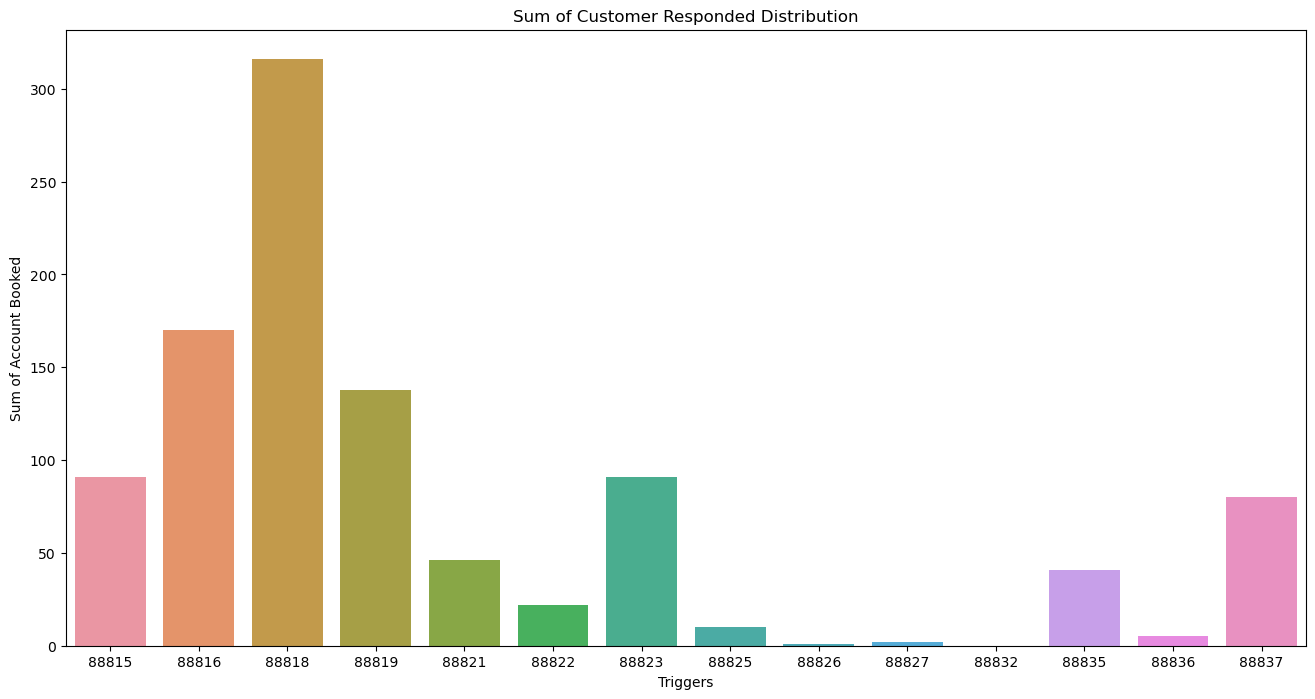

In [19]:
plt.figure(figsize=(16,8))
sns.barplot(trigger_campaign_performance_df_branch,x='Triggers',y='Sum of Account Booked')
plt.xlabel('Triggers')
plt.ylabel('Sum of Account Booked')
plt.title('Sum of Customer Responded Distribution')
plt.show()

Compare the distribution of sum of Customer Trageted to sum of customer responsed

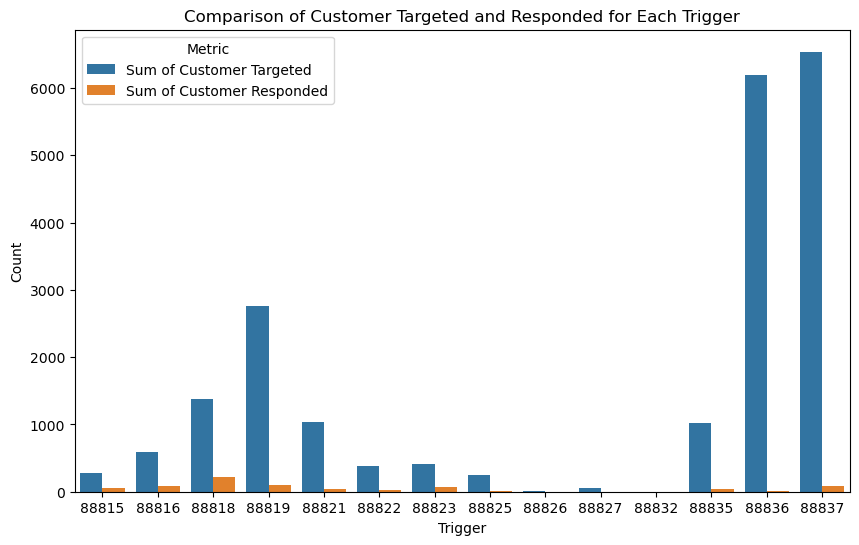

In [20]:
df_melted = trigger_campaign_performance_df_branch.melt(id_vars='Triggers', value_vars=['Sum of Customer Targeted', 'Sum of Customer Responded'],
                    var_name='Metric', value_name='Count')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Triggers', y='Count', hue='Metric', data=df_melted)
plt.title('Comparison of Customer Targeted and Responded for Each Trigger')
plt.xlabel('Trigger')
plt.ylabel('Count')
plt.legend(title='Metric')
plt.show()

Rename Column Tigger to Triggers to properly concat both datasets

In [21]:
trigger_campaign_performance_df_ccc.rename(columns={'Trigger': 'Triggers'}, inplace=True)


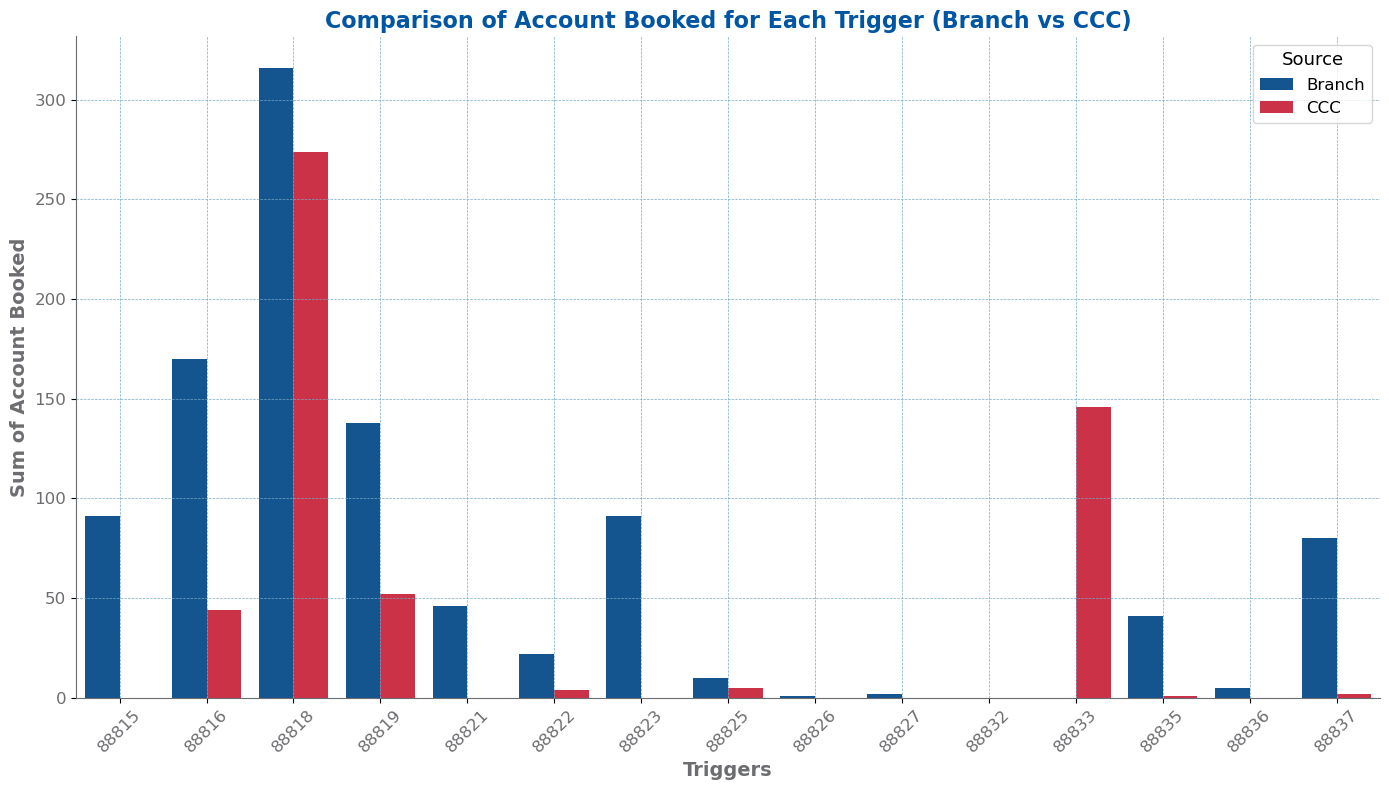

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# BMO Harris Bank color scheme
bmo_blue = "#0056A3"
bmo_red = "#E51836"
bmo_grey = "#6C6D70"
bmo_light_blue = "#78A9C7"

# Set the color palette for seaborn
sns.set_palette([bmo_blue, bmo_red])

# Add 'Source' column to each DataFrame
trigger_campaign_performance_df_branch['Source'] = 'Branch'
trigger_campaign_performance_df_ccc['Source'] = 'CCC'

# Combine both DataFrames into one
combined_df = pd.concat([trigger_campaign_performance_df_branch, trigger_campaign_performance_df_ccc])

# Melt the DataFrame for easier plotting with seaborn
df_melted = combined_df.melt(id_vars=['Triggers', 'Source'], value_vars=['Sum of Account Booked'],
                             var_name='Metric', value_name='Count')

# Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Triggers', y='Count', hue='Source', data=df_melted, palette=[bmo_blue, bmo_red])

# Add titles and labels
plt.title('Comparison of Account Booked for Each Trigger (Branch vs CCC)', fontsize=16, fontweight='bold', color=bmo_blue)
plt.xlabel('Triggers', fontsize=14, fontweight='bold', color=bmo_grey)
plt.ylabel('Sum of Account Booked', fontsize=14, fontweight='bold', color=bmo_grey)
plt.legend(title='Source', title_fontsize='13', fontsize='12')

# Customize tick labels
plt.xticks(rotation=45, fontsize=12, color=bmo_grey)
plt.yticks(fontsize=12, color=bmo_grey)

# Add gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color=bmo_light_blue)

# Customize plot borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color(bmo_grey)
plt.gca().spines['bottom'].set_color(bmo_grey)

# Ensure everything fits nicely
plt.tight_layout()

# Show the plot
plt.show()


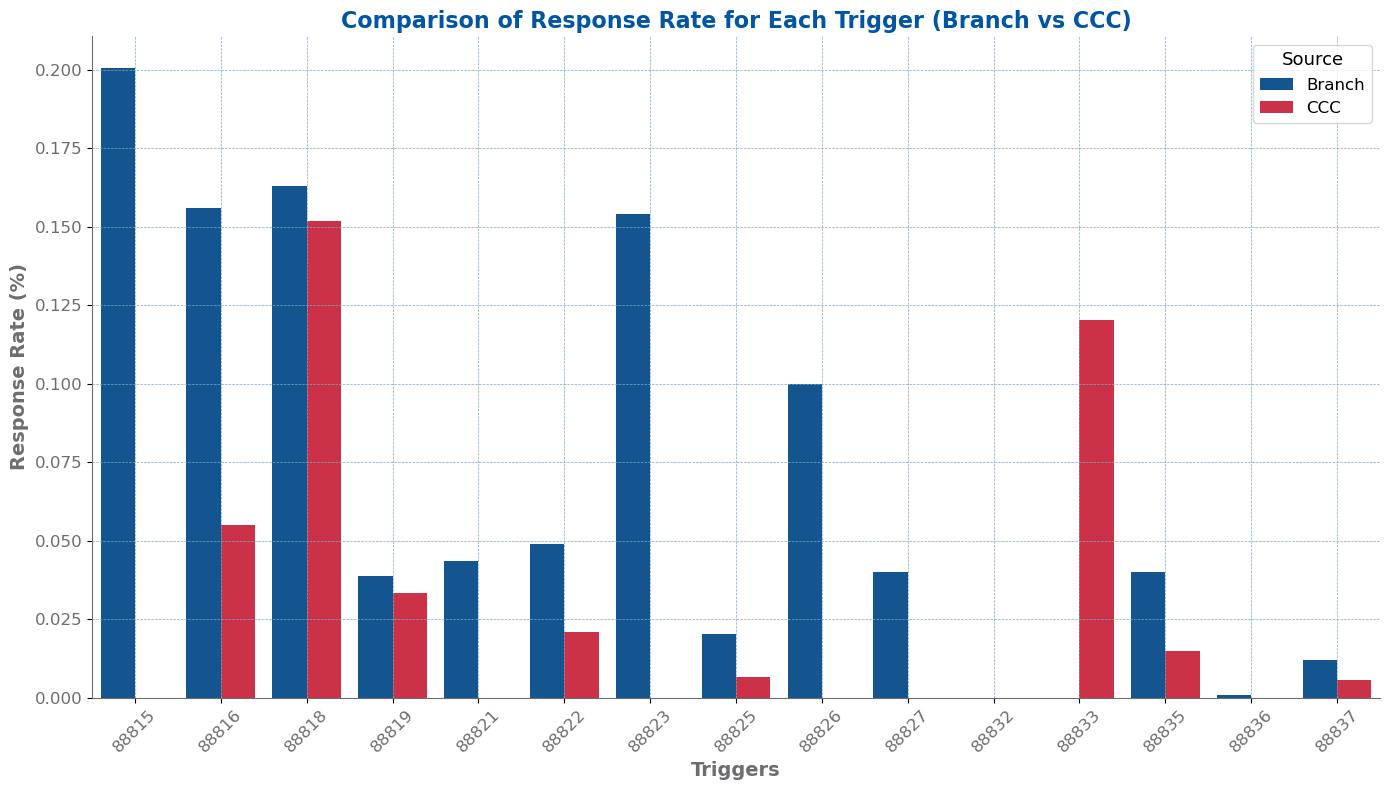

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# BMO Harris Bank color scheme
bmo_blue = "#0056A3"
bmo_red = "#E51836"
bmo_grey = "#6C6D70"
bmo_light_blue = "#78A9C7"

# Set the color palette for seaborn
sns.set_palette([bmo_blue, bmo_red])

# Add 'Source' column to each DataFrame
trigger_campaign_performance_df_branch['Source'] = 'Branch'
trigger_campaign_performance_df_ccc['Source'] = 'CCC'

# Combine both DataFrames into one
combined_df = pd.concat([trigger_campaign_performance_df_branch, trigger_campaign_performance_df_ccc])

# Melt the DataFrame for easier plotting with seaborn
df_melted = combined_df.melt(id_vars=['Triggers', 'Source'], value_vars=['Response Rate'],
                             var_name='Metric', value_name='Rate')

# Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Triggers', y='Rate', hue='Source', data=df_melted, palette=[bmo_blue, bmo_red])

# Add titles and labels
plt.title('Comparison of Response Rate for Each Trigger (Branch vs CCC)', fontsize=16, fontweight='bold', color=bmo_blue)
plt.xlabel('Triggers', fontsize=14, fontweight='bold', color=bmo_grey)
plt.ylabel('Response Rate (%)', fontsize=14, fontweight='bold', color=bmo_grey)
plt.legend(title='Source', title_fontsize='13', fontsize='12')

# Customize tick labels
plt.xticks(rotation=45, fontsize=12, color=bmo_grey)
plt.yticks(fontsize=12, color=bmo_grey)

# Add gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color=bmo_light_blue)

# Customize plot borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color(bmo_grey)
plt.gca().spines['bottom'].set_color(bmo_grey)

# Ensure everything fits nicely
plt.tight_layout()

# Show the plot
plt.show()


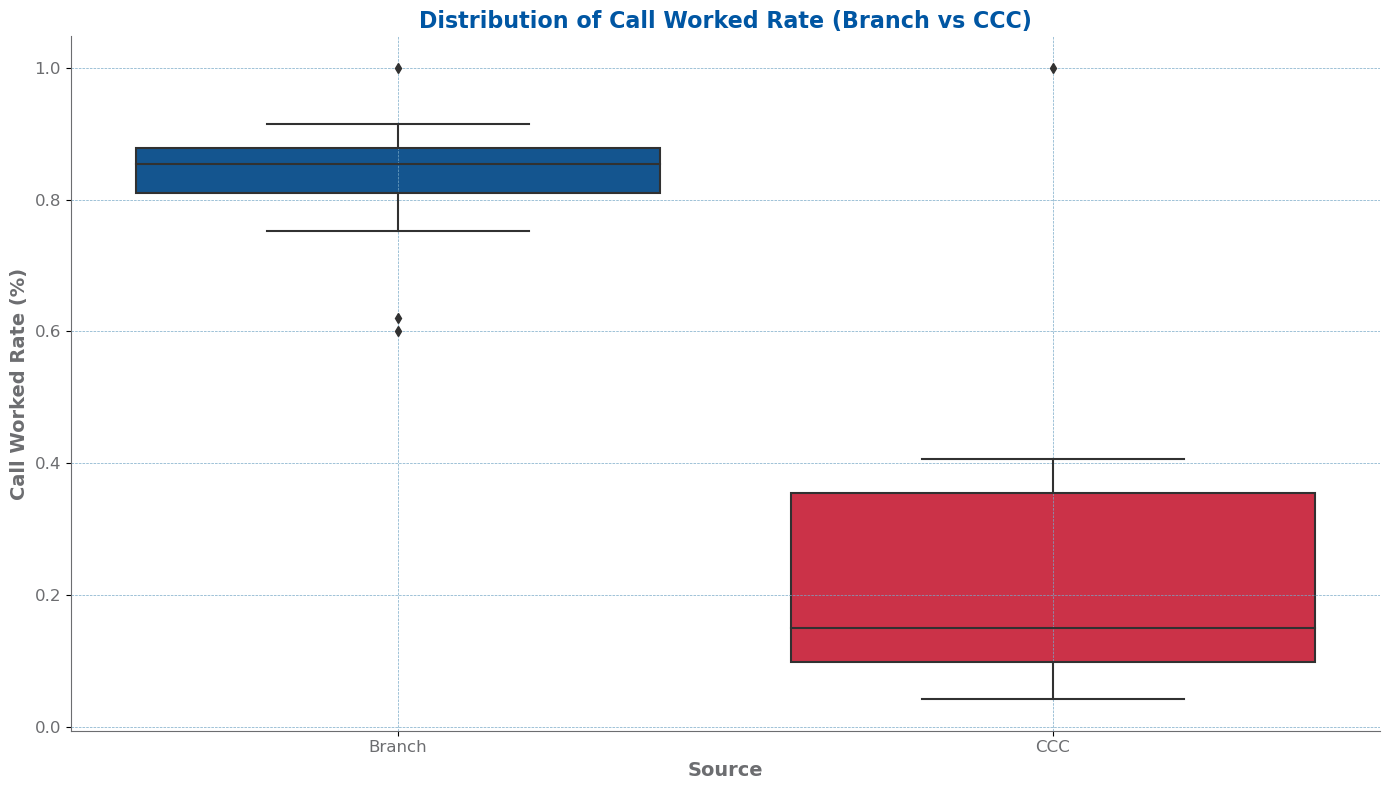

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# BMO Harris Bank color scheme
bmo_blue = "#0056A3"
bmo_red = "#E51836"
bmo_grey = "#6C6D70"
bmo_light_blue = "#78A9C7"

# Set the color palette for seaborn
sns.set_palette([bmo_blue, bmo_red])

# Add 'Source' column to each DataFrame
trigger_campaign_performance_df_branch['Source'] = 'Branch'
trigger_campaign_performance_df_ccc['Source'] = 'CCC'

# Combine both DataFrames into one
combined_df = pd.concat([trigger_campaign_performance_df_branch, trigger_campaign_performance_df_ccc])

# Melt the DataFrame for easier plotting with seaborn
df_melted = combined_df.melt(id_vars=['Triggers', 'Source'], value_vars=['Call Worked Rate'],
                             var_name='Metric', value_name='Rate')

# Create the box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Source', y='Rate', data=df_melted, palette=[bmo_blue, bmo_red])

# Add titles and labels
plt.title('Distribution of Call Worked Rate (Branch vs CCC)', fontsize=16, fontweight='bold', color=bmo_blue)
plt.xlabel('Source', fontsize=14, fontweight='bold', color=bmo_grey)
plt.ylabel('Call Worked Rate (%)', fontsize=14, fontweight='bold', color=bmo_grey)

# Customize tick labels
plt.xticks(fontsize=12, color=bmo_grey)
plt.yticks(fontsize=12, color=bmo_grey)

# Add gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color=bmo_light_blue)

# Customize plot borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color(bmo_grey)
plt.gca().spines['bottom'].set_color(bmo_grey)

# Ensure everything fits nicely
plt.tight_layout()

# Show the plot
plt.show()


# Analysis on Cross Sell Campaign Performance

In [23]:
start_row = 2  # The first row to load (1-based index)
end_row = 8  # The last row to load (1-based index)

# Calculate the number of rows to skip and the number of rows to read
skip_rows_cross = list(range(start_row - 1))  # Rows to skip (0-based index)
num_rows_cross = end_row - start_row + 1

cross_sell_campaign_performance_df = pd.read_excel(xls, sheet_name='Cross Sell campaign performance',skiprows=skip_rows_cross,nrows=num_rows_cross)

display(cross_sell_campaign_performance_df)

,CAMPAIGNS >>,Progress Check,Unnamed: 2,Unnamed: 3,Tenure x-sell,Unnamed: 5,Unnamed: 6,CC pre-select,Unnamed: 8,Unnamed: 9,Triggers,Unnamed: 11,Unnamed: 12
0,METRICS,Nov'23,Nov'22,%Change,Nov'23,Nov'22,%Change,Nov'23,Nov'22,%Change,Nov'23,Nov'22,%Change
1,Total Leads,325802,244046,0.335002,124695,117372,0.062391,486380,367617,0.323062,23367,4270,4.472365
2,Response,0.0179,0.019,-0.057895,0.001,0.001,0,0.0032,0.0055,-0.418182,0.072,0.0508,0.417323
3,Total Accounts Booked,6131,4382,0.399133,124,112,0.107143,1288,1548,-0.167959,1136,257,3.420233
4,Total Balances,168944785,42225164,3.001045,992672,964501,0.029208,451617,556652,-0.188691,398053,54830,6.259767
5,Total LTV,5231797,4793132,0.091519,114115,83776,0.362144,523809,630036,-0.168605,1388629,386045,2.597065


In [24]:
df_dropped = cross_sell_campaign_performance_df.drop([0])

display(df_dropped)

,CAMPAIGNS >>,Progress Check,Unnamed: 2,Unnamed: 3,Tenure x-sell,Unnamed: 5,Unnamed: 6,CC pre-select,Unnamed: 8,Unnamed: 9,Triggers,Unnamed: 11,Unnamed: 12
1,Total Leads,325802,244046,0.335002,124695,117372,0.062391,486380,367617,0.323062,23367,4270,4.472365
2,Response,0.0179,0.019,-0.057895,0.001,0.001,0,0.0032,0.0055,-0.418182,0.072,0.0508,0.417323
3,Total Accounts Booked,6131,4382,0.399133,124,112,0.107143,1288,1548,-0.167959,1136,257,3.420233
4,Total Balances,168944785,42225164,3.001045,992672,964501,0.029208,451617,556652,-0.188691,398053,54830,6.259767
5,Total LTV,5231797,4793132,0.091519,114115,83776,0.362144,523809,630036,-0.168605,1388629,386045,2.597065


In [25]:
df_dropped.rename(columns={
    # 'CAMPAIGNS >>' : "Campaigns",
    'Progress Check': "Progress Check Nov'23",
    'Unnamed: 2': "Progress Check Nov'22",
    'Unnamed: 3': "Progress Check Change%",
    'Tenure x-sell' : "Tenure x-sell Nov'23",
    'Unnamed: 5' : "Tenure x-sell Nov'22",
    'Unnamed: 6' : "Tenure x-sell Change%",
    'CC pre-select' : "CC pre-select Nov'23",
    'Unnamed: 8' : "CC pre-select Nov'22",
    'Unnamed: 9' : "CC pre-select Change%",
    'Triggers' : "Triggers Nov'23",
    'Unnamed: 11' : "Triggers Nov'22",
    'Unnamed: 12' : "Triggers Change%",

}, inplace=True)

# Display the DataFrame
display(df_dropped)

,CAMPAIGNS >>,Progress Check Nov'23,Progress Check Nov'22,Progress Check Change%,Tenure x-sell Nov'23,Tenure x-sell Nov'22,Tenure x-sell Change%,CC pre-select Nov'23,CC pre-select Nov'22,CC pre-select Change%,Triggers Nov'23,Triggers Nov'22,Triggers Change%
1,Total Leads,325802,244046,0.335002,124695,117372,0.062391,486380,367617,0.323062,23367,4270,4.472365
2,Response,0.0179,0.019,-0.057895,0.001,0.001,0,0.0032,0.0055,-0.418182,0.072,0.0508,0.417323
3,Total Accounts Booked,6131,4382,0.399133,124,112,0.107143,1288,1548,-0.167959,1136,257,3.420233
4,Total Balances,168944785,42225164,3.001045,992672,964501,0.029208,451617,556652,-0.188691,398053,54830,6.259767
5,Total LTV,5231797,4793132,0.091519,114115,83776,0.362144,523809,630036,-0.168605,1388629,386045,2.597065


In [26]:
df_dropped.to_csv('campaign.csv')

In [27]:
data = df_dropped

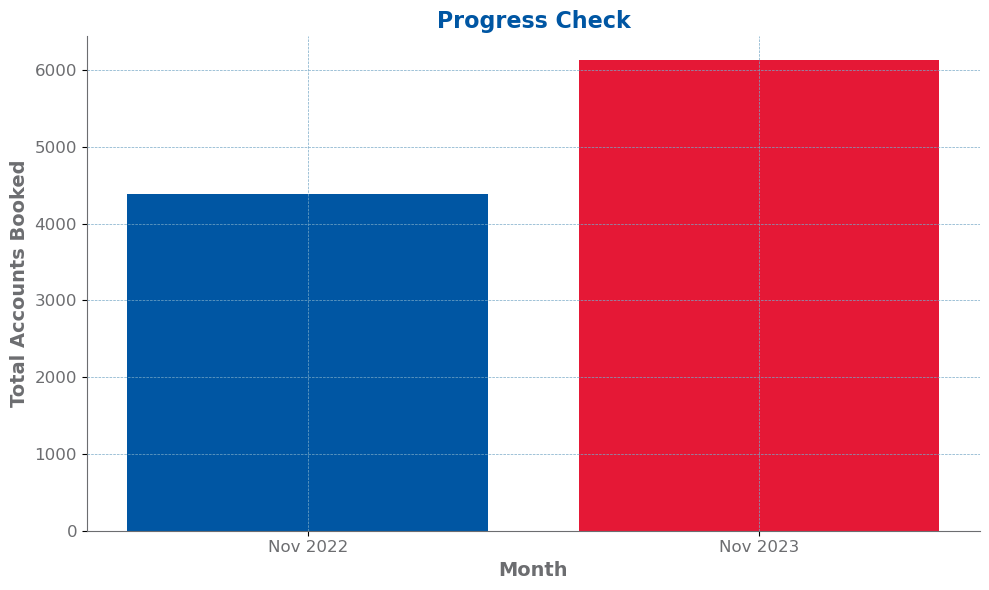

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# BMO Harris Bank color scheme
bmo_blue = "#0056A3"
bmo_red = "#E51836"
bmo_grey = "#6C6D70"
bmo_light_blue = "#78A9C7"

# Extract the total accounts booked for Nov 2022 and Nov 2023
total_accounts_nov23 = data.loc[data['CAMPAIGNS  >>'] == 'Total Accounts Booked', 'Progress Check Nov\'23'].values[0]
total_accounts_nov22 = data.loc[data['CAMPAIGNS  >>'] == 'Total Accounts Booked', 'Progress Check Nov\'22'].values[0]

# Data for plotting
months = ['Nov 2022', 'Nov 2023']
total_accounts = [total_accounts_nov22, total_accounts_nov23]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(months, total_accounts, color=[bmo_blue, bmo_red])
plt.xlabel('Month', fontsize=14, fontweight='bold', color=bmo_grey)
plt.ylabel('Total Accounts Booked', fontsize=14, fontweight='bold', color=bmo_grey)
plt.title('Progress Check', fontsize=16, fontweight='bold', color=bmo_blue)

# Customize ticks
plt.xticks(fontsize=12, color=bmo_grey)
plt.yticks(fontsize=12, color=bmo_grey)

# Add gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color=bmo_light_blue)

# Customize plot borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color(bmo_grey)
plt.gca().spines['bottom'].set_color(bmo_grey)

# Ensure everything fits nicely
plt.tight_layout()

# Show the plot
plt.show()


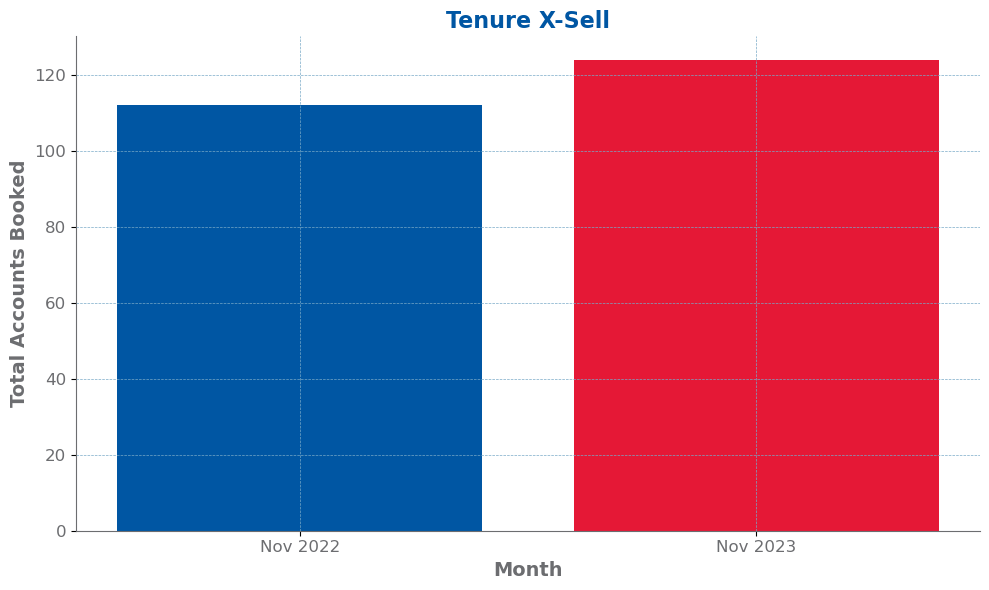

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# BMO Harris Bank color scheme
bmo_blue = "#0056A3"
bmo_red = "#E51836"
bmo_grey = "#6C6D70"
bmo_light_blue = "#78A9C7"

# Extract the total accounts booked for Nov 2022 and Nov 2023
total_accounts_nov23 = data.loc[data['CAMPAIGNS  >>'] == 'Total Accounts Booked', 'Tenure x-sell Nov\'23'].values[0]
total_accounts_nov22 = data.loc[data['CAMPAIGNS  >>'] == 'Total Accounts Booked', 'Tenure x-sell Nov\'22'].values[0]

# Data for plotting
months = ['Nov 2022', 'Nov 2023']
total_accounts = [total_accounts_nov22, total_accounts_nov23]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(months, total_accounts, color=[bmo_blue, bmo_red])

# Add titles and labels
plt.xlabel('Month', fontsize=14, fontweight='bold', color=bmo_grey)
plt.ylabel('Total Accounts Booked', fontsize=14, fontweight='bold', color=bmo_grey)
plt.title('Tenure X-Sell', fontsize=16, fontweight='bold', color=bmo_blue)

# Customize ticks
plt.xticks(fontsize=12, color=bmo_grey)
plt.yticks(fontsize=12, color=bmo_grey)

# Add gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color=bmo_light_blue)

# Customize plot borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color(bmo_grey)
plt.gca().spines['bottom'].set_color(bmo_grey)

# Ensure everything fits nicely
plt.tight_layout()

# Show the plot
plt.show()


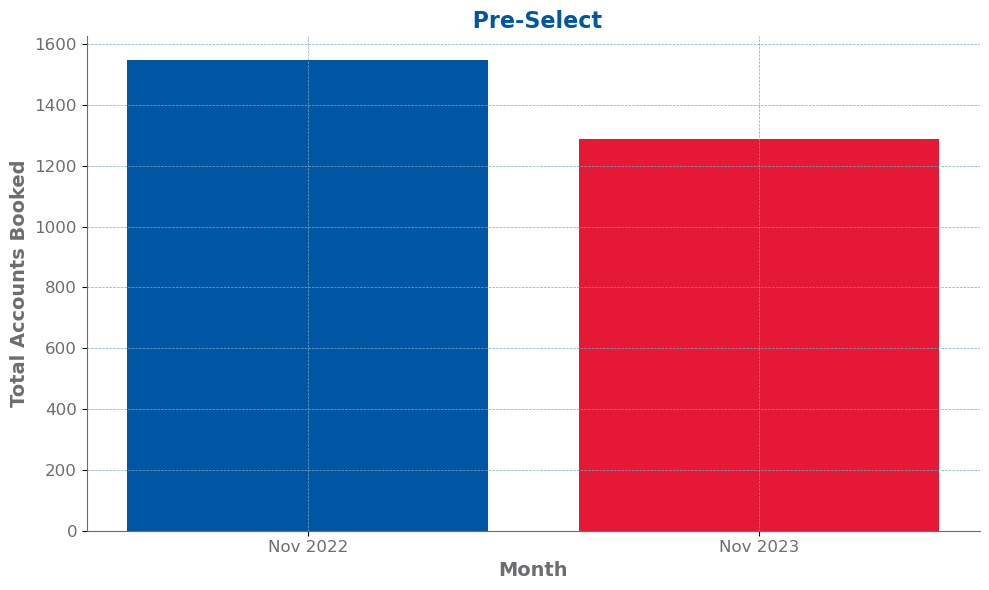

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# BMO Harris Bank color scheme
bmo_blue = "#0056A3"
bmo_red = "#E51836"
bmo_grey = "#6C6D70"
bmo_light_blue = "#78A9C7"

# Extract the total accounts booked for Nov 2022 and Nov 2023
total_accounts_nov23 = data.loc[data['CAMPAIGNS  >>'] == 'Total Accounts Booked', 'CC pre-select Nov\'23'].values[0]
total_accounts_nov22 = data.loc[data['CAMPAIGNS  >>'] == 'Total Accounts Booked', 'CC pre-select Nov\'22'].values[0]

# Data for plotting
months = ['Nov 2022', 'Nov 2023']
total_accounts = [total_accounts_nov22, total_accounts_nov23]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(months, total_accounts, color=[bmo_blue, bmo_red])

# Add titles and labels
plt.xlabel('Month', fontsize=14, fontweight='bold', color=bmo_grey)
plt.ylabel('Total Accounts Booked', fontsize=14, fontweight='bold', color=bmo_grey)
plt.title(' Pre-Select', fontsize=16, fontweight='bold', color=bmo_blue)

# Customize ticks
plt.xticks(fontsize=12, color=bmo_grey)
plt.yticks(fontsize=12, color=bmo_grey)

# Add gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color=bmo_light_blue)

# Customize plot borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color(bmo_grey)
plt.gca().spines['bottom'].set_color(bmo_grey)

# Ensure everything fits nicely
plt.tight_layout()

# Show the plot
plt.show()


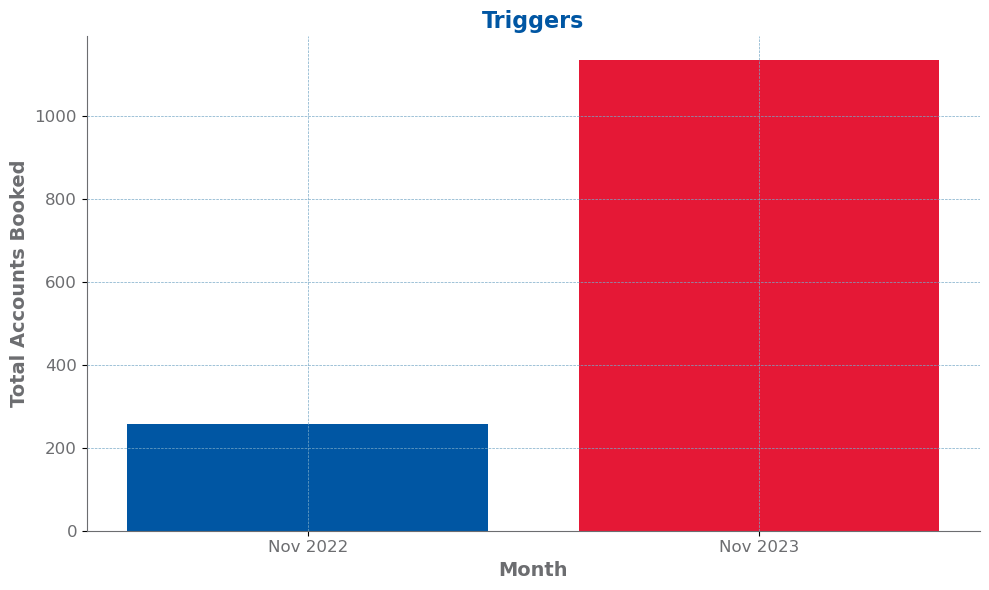

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# BMO Harris Bank color scheme
bmo_blue = "#0056A3"
bmo_red = "#E51836"
bmo_grey = "#6C6D70"
bmo_light_blue = "#78A9C7"

# Extract the total accounts booked for Nov 2022 and Nov 2023
total_accounts_nov23 = data.loc[data['CAMPAIGNS  >>'] == 'Total Accounts Booked', 'Triggers Nov\'23'].values[0]
total_accounts_nov22 = data.loc[data['CAMPAIGNS  >>'] == 'Total Accounts Booked', 'Triggers Nov\'22'].values[0]

# Data for plotting
months = ['Nov 2022', 'Nov 2023']
total_accounts = [total_accounts_nov22, total_accounts_nov23]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(months, total_accounts, color=[bmo_blue, bmo_red])

# Add titles and labels
plt.xlabel('Month', fontsize=14, fontweight='bold', color=bmo_grey)
plt.ylabel('Total Accounts Booked', fontsize=14, fontweight='bold', color=bmo_grey)
plt.title('Triggers', fontsize=16, fontweight='bold', color=bmo_blue)

# Customize ticks
plt.xticks(fontsize=12, color=bmo_grey)
plt.yticks(fontsize=12, color=bmo_grey)

# Add gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color=bmo_light_blue)

# Customize plot borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color(bmo_grey)
plt.gca().spines['bottom'].set_color(bmo_grey)

# Ensure everything fits nicely
plt.tight_layout()

# Show the plot
plt.show()


Distribution of Mails used for campaigns

In [32]:
start_row = 34  # The first row to load (1-based index)
end_row = 39  # The last row to load (1-based index)

# Calculate the number of rows to skip and the number of rows to read
skip_rows_cross = list(range(start_row - 1))  # Rows to skip (0-based index)
num_rows_cross = end_row - start_row + 1

cross_sell_campaign_performance_mail_df = pd.read_excel(xls, sheet_name='Cross Sell campaign performance',skiprows=skip_rows_cross,nrows=num_rows_cross)

display(cross_sell_campaign_performance_mail_df)

,Email,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Total Emails,287724.00000,240460.00000,0.196557,124695.00000,117372.000000,0.062391,328468.00000,214104.000000,0.534152,NaN,NaN,NaN
1,Email Opens,133503.93600,90893.88000,0.468789,53494.15500,44483.988000,0.202549,162591.66000,106837.896000,0.521854,NaN,NaN,NaN
2,opne rate,0.46400,0.37800,0.227513,0.42900,0.379000,0.131926,0.49500,0.499000,-0.008016,NaN,NaN,NaN
3,clicks,667.51968,545.36328,0.223991,320.96493,177.935952,0.803823,1138.14162,961.541064,0.183664,NaN,NaN,NaN
4,click rate,0.00500,0.00600,-0.166667,0.00600,0.004000,0.500000,0.00700,0.009000,-0.222222,NaN,NaN,NaN


In [33]:
cross_sell_campaign_performance_mail_df.columns = ['Email','Progress Check Nov\'23','Progress Check Nov\'22','Progress Check Change%','Tenure x-sell Nov\'23','Tenure x-sell Nov\'22','Tenure x-sell Change%','CC pre-select Nov\'23','CC pre-select Nov\'22','CC pre-select Change%','Triggers Nov\'23','Triggers Nov\'22','Triggers Change%']

In [34]:
display(cross_sell_campaign_performance_mail_df)

,Email,Progress Check Nov'23,Progress Check Nov'22,Progress Check Change%,Tenure x-sell Nov'23,Tenure x-sell Nov'22,Tenure x-sell Change%,CC pre-select Nov'23,CC pre-select Nov'22,CC pre-select Change%,Triggers Nov'23,Triggers Nov'22,Triggers Change%
0,Total Emails,287724.00000,240460.00000,0.196557,124695.00000,117372.000000,0.062391,328468.00000,214104.000000,0.534152,NaN,NaN,NaN
1,Email Opens,133503.93600,90893.88000,0.468789,53494.15500,44483.988000,0.202549,162591.66000,106837.896000,0.521854,NaN,NaN,NaN
2,opne rate,0.46400,0.37800,0.227513,0.42900,0.379000,0.131926,0.49500,0.499000,-0.008016,NaN,NaN,NaN
3,clicks,667.51968,545.36328,0.223991,320.96493,177.935952,0.803823,1138.14162,961.541064,0.183664,NaN,NaN,NaN
4,click rate,0.00500,0.00600,-0.166667,0.00600,0.004000,0.500000,0.00700,0.009000,-0.222222,NaN,NaN,NaN
